Prediction Questions Your Model Can Answer:
1. “How many tons of product will a warehouse produce given its zone, worker count, and distance from the hub?”

2. “What is the estimated product weight output if the warehouse is located in a rural zone with mid-size capacity?”

3. “How much product (in tons) should we expect from a warehouse with 30 workers and an A+ government certificate?”

4. “If a warehouse is in Zone 4 and 25 km from the hub, how much product weight can we predict?”

5. “Based on warehouse characteristics, what will be the total product_wg_ton this facility is likely to generate?”

In [3]:
print("hellow world")

hellow world


In [179]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
%pip install pandas numpy matplotlib seaborn


  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 40.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 64.6 MB/s eta 0:00:00
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13/13 [seaborn]2/13 [seaborn]ib]
Note: you may need to restart the kernel to use updated packages.


In [148]:
%pip install plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 52.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install scikit-learn


  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 64.5 MB/s eta 0:00:00a 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd         # For data handling
import numpy as np          # For numerical operations
import matplotlib.pyplot as plt   # For plots
import seaborn as sns       # For advanced visualizations


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [7]:
df = pd.read_csv("data.csv")

In [22]:
df.head(10)

,Unnamed: 0,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,...,1,1,91,29.0,13,0,A,5,15,17115
1,1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,...,0,1,210,31.0,4,0,A,3,17,5074
2,2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,...,0,0,161,37.0,17,0,A,6,22,23137
3,3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,...,0,0,103,21.0,17,1,A+,3,27,22115
4,4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,...,0,1,112,25.0,18,0,C,6,24,24071
5,5,Rural,Small,West,Zone 1,8,0,2,5053,Rented,...,0,1,152,35.0,23,1,A+,3,3,32134
6,6,Rural,Large,West,Zone 6,8,0,4,4449,Company Owned,...,0,1,77,27.0,24,0,B,3,6,30142
7,7,Rural,Large,North,Zone 5,1,0,4,7183,Rented,...,0,0,241,23.0,18,0,C,6,24,24093
8,8,Rural,Small,South,Zone 6,8,1,4,5381,Rented,...,0,1,124,22.0,13,1,A+,5,2,18082
9,9,Rural,Small,South,Zone 6,4,3,3,3869,Company Owned,...,0,0,78,43.0,6,0,C,6,2,7130


In [19]:
# Show basic structure
print(df.shape)



(25000, 22)


In [25]:
print(df.columns)

Index(['Unnamed: 0', 'Location_type', 'WH_capacity_size', 'zone',
       'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')


In [21]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    25000 non-null  int64  
 1   Location_type                 25000 non-null  object 
 2   WH_capacity_size              25000 non-null  object 
 3   zone                          25000 non-null  object 
 4   WH_regional_zone              25000 non-null  object 
 5   num_refill_req_l3m            25000 non-null  int64  
 6   transport_issue_l1y           25000 non-null  int64  
 7   Competitor_in_mkt             25000 non-null  int64  
 8   retail_shop_num               25000 non-null  int64  
 9   wh_owner_type                 25000 non-null  object 
 10  distributor_num               25000 non-null  int64  
 11  flood_impacted                25000 non-null  int64  
 12  flood_proof                   25000 non-null  int64  
 13  e

In [27]:
df.isnull().sum()

Unnamed: 0                      0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

### Zero Variance

In [45]:
variances = df.var(numeric_only=True)

variances_sorted = variances.sort_values(ascending=True)

for feature, var in variances_sorted.items():
    print(f"{feature:<30} {var:.5f}")


flood_proof                    0.05166
flood_impacted                 0.08853
temp_reg_mach                  0.21131
electric_supply                0.22540
Competitor_in_mkt              1.30339
transport_issue_l1y            1.43868
wh_breakdown_l3m               2.85723
num_refill_req_l3m             6.79442
workers_num                    59.55633
govt_check_l3m                 74.51802
storage_issue_reported_l3m     83.92590
distributor_num                258.06266
dist_from_hub                  3933.62395
retail_shop_num                1108441.01120
Unnamed: 0                     52085416.66667
product_wg_ton                 134739977.91825


### Categorical Cardinality Analysis

In [49]:
for feature in df.select_dtypes('object'):
    print(feature, df[feature].nunique())


Location_type 2
WH_capacity_size 3
zone 4
WH_regional_zone 6
wh_owner_type 2
approved_wh_govt_certificate 5


In [50]:
df.columns

Index(['Unnamed: 0', 'Location_type', 'WH_capacity_size', 'zone',
       'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

### Outlier Check

In [56]:
df.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12499.500000,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.907000,17.130440,0.303280,3.482040,18.812280,22102.632920
std,7217.022701,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.717275,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,6249.750000,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,12499.500000,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,18749.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,24999.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [57]:
df.describe().loc['max'].sort_values(ascending=False)


product_wg_ton                55151.0
Unnamed: 0                    24999.0
retail_shop_num               11008.0
dist_from_hub                   271.0
workers_num                      98.0
distributor_num                  70.0
storage_issue_reported_l3m       39.0
govt_check_l3m                   32.0
Competitor_in_mkt                12.0
num_refill_req_l3m                8.0
wh_breakdown_l3m                  6.0
transport_issue_l1y               5.0
flood_impacted                    1.0
flood_proof                       1.0
electric_supply                   1.0
temp_reg_mach                     1.0
Name: max, dtype: float64

We compare mean vs 50% (median) to quickly check if the data is skewed or has outliers. If both values are close → data is balanced ✅. But if the mean is much higher or lower than median, it means some extreme values are pulling the average — that's a red flag for outliers 🚨. It’s just a smart, early warning before plotting or cleaning.

In [83]:
df.describe().loc[['mean','50%'],:]


,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
mean,12499.5,4.08904,0.77368,3.1042,4985.71156,42.41812,0.09816,0.05464,0.65688,163.53732,28.907,17.13044,0.30328,3.48204,18.81228,22102.63292
50%,12499.5,4.00000,0.00000,3.0000,4859.00000,42.00000,0.00000,0.00000,1.00000,164.00000,28.000,18.00000,0.00000,3.00000,21.00000,22101.00000


Purpose: To check skewness in numeric columns.

Why?
If mean ≈ median → distribution is likely symmetric (normal or near-normal).

If mean ≫ median → right-skewed (possible high outliers).

If mean ≪ median → left-skewed (possible low outliers).

In [98]:
for feature in df.select_dtypes(include=['int', 'float']):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outlier_count = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).sum()
    outlier_percentage = (outlier_count / len(df)) * 100

    print(f"{feature:<30} Outliers: {outlier_count:<5} ({outlier_percentage:.2f}%)")


Unnamed: 0                     Outliers: 0     (0.00%)
num_refill_req_l3m             Outliers: 0     (0.00%)
transport_issue_l1y            Outliers: 2943  (11.77%)
Competitor_in_mkt              Outliers: 96    (0.38%)
retail_shop_num                Outliers: 948   (3.79%)
distributor_num                Outliers: 0     (0.00%)
flood_impacted                 Outliers: 2454  (9.82%)
flood_proof                    Outliers: 1366  (5.46%)
electric_supply                Outliers: 0     (0.00%)
dist_from_hub                  Outliers: 0     (0.00%)
workers_num                    Outliers: 607   (2.43%)
storage_issue_reported_l3m     Outliers: 0     (0.00%)
temp_reg_mach                  Outliers: 0     (0.00%)
wh_breakdown_l3m               Outliers: 0     (0.00%)
govt_check_l3m                 Outliers: 0     (0.00%)
product_wg_ton                 Outliers: 0     (0.00%)


In the outlier detection process, we're using statistical methods like the IQR rule to identify columns that might contain extreme values. But this method is designed for continuous numeric variables that have a natural range and spread. When we include binary columns like flood_impacted or flood_proof, which only have values like 0 and 1, the IQR logic fails — it falsely identifies the less frequent value (like 1) as an outlier simply because it’s rare.

So, we remove (skip) these binary columns from the outlier detection loop, not because they are bad or useless, but because the outlier logic doesn't make sense for them. They are still kept in the dataset and will be used later during model training, because binary features often carry strong predictive power in classification or regression tasks.

In short: we’re not removing these columns from the data, we’re just removing them from outlier logic to avoid incorrect handling. This keeps the dataset statistically clean without losing important information.









In [99]:
# Recreate the list first (if you’re in a new cell)
outlier_containing_features = ['transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'workers_num', 'flood_impacted', 'flood_proof']

# Now remove binary columns from it
outlier_containing_features.remove('flood_proof')
outlier_containing_features.remove('flood_impacted')

# Check updated list
print(outlier_containing_features)


['transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'workers_num']


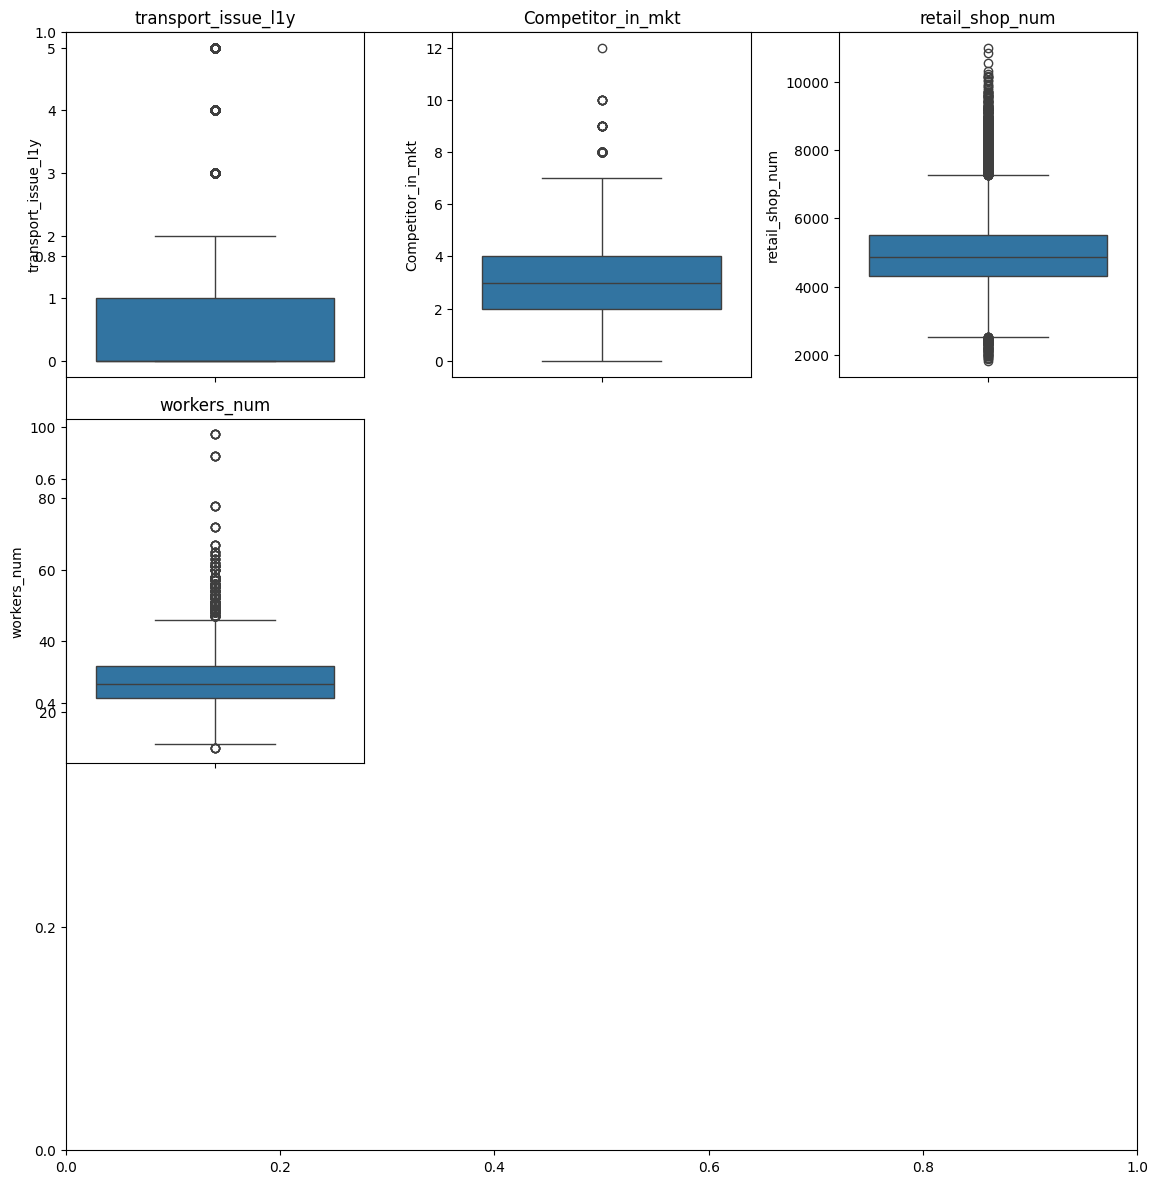

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(12, 12))

for i, feature in enumerate(outlier_containing_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.xlabel("")
    
plt.tight_layout()
plt.show()


In [106]:
df_treated = df.copy()

for feature in outlier_containing_features:
    # Ensure the column is float to avoid dtype warning
    df_treated[feature] = df_treated[feature].astype(float)

    # Calculate IQR bounds
    Q1 = df_treated[feature].quantile(0.25)
    Q3 = df_treated[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Apply capping
    df_treated.loc[df_treated[feature] < lower, feature] = lower
    df_treated.loc[df_treated[feature] > upper, feature] = upper


In [107]:
df_treated.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12499.500000,4.089040,0.655900,3.099200,4958.893200,42.418120,0.098160,0.054640,0.656880,163.537320,28.736500,17.130440,0.303280,3.482040,18.812280,22102.632920
std,7217.022701,2.606612,0.918161,1.120772,969.402141,16.064329,0.297537,0.227281,0.474761,62.718609,7.138484,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,0.000000,2532.500000,15.000000,0.000000,0.000000,0.000000,55.000000,10.500000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,6249.750000,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,12499.500000,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,18749.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,24999.000000,8.000000,2.500000,7.000000,7280.500000,70.000000,1.000000,1.000000,1.000000,271.000000,46.500000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [126]:
binary_cols = ['flood_impacted', 'flood_proof']

for feature in df_treated.select_dtypes(include=['int', 'float']):
    if feature in binary_cols:
        continue  # ❌ Skip binary columns

    Q1 = df_treated[feature].quantile(0.25)
    Q3 = df_treated[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers in df_treated
    outlier_count = ((df_treated[feature] < lower_bound) | (df_treated[feature] > upper_bound)).sum()
    outlier_percentage = (outlier_count / len(df_treated)) * 100

    print(f"{feature:<30} Outliers: {outlier_count:<5} ({outlier_percentage:.2f}%)")


Unnamed: 0                     Outliers: 0     (0.00%)
num_refill_req_l3m             Outliers: 0     (0.00%)
transport_issue_l1y            Outliers: 0     (0.00%)
Competitor_in_mkt              Outliers: 0     (0.00%)
retail_shop_num                Outliers: 0     (0.00%)
distributor_num                Outliers: 0     (0.00%)
electric_supply                Outliers: 0     (0.00%)
dist_from_hub                  Outliers: 0     (0.00%)
workers_num                    Outliers: 0     (0.00%)
storage_issue_reported_l3m     Outliers: 0     (0.00%)
temp_reg_mach                  Outliers: 0     (0.00%)
wh_breakdown_l3m               Outliers: 0     (0.00%)
govt_check_l3m                 Outliers: 0     (0.00%)
product_wg_ton                 Outliers: 0     (0.00%)


In [127]:
df_treated.head()

,Unnamed: 0,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,Urban,Small,West,Zone 6,3,1.0,2.0,4651.0,Rented,...,1,1,91,29.0,13,0,A,5,15,17115
1,1,Rural,Large,North,Zone 5,0,0.0,4.0,6217.0,Company Owned,...,0,1,210,31.0,4,0,A,3,17,5074
2,2,Rural,Mid,South,Zone 2,1,0.0,4.0,4306.0,Company Owned,...,0,0,161,37.0,17,0,A,6,22,23137
3,3,Rural,Mid,North,Zone 3,7,2.5,2.0,6000.0,Rented,...,0,0,103,21.0,17,1,A+,3,27,22115
4,4,Rural,Large,North,Zone 5,3,1.0,2.0,4740.0,Company Owned,...,0,1,112,25.0,18,0,C,6,24,24071


In [125]:
print(df_treated.columns)


Index(['Unnamed: 0', 'Location_type', 'WH_capacity_size', 'zone',
       'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')


In [133]:
print("Total columns:", len(df_treated.columns))

Total columns: 22


In [135]:
df_treated.head(10)

,Unnamed: 0,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,Urban,Small,West,Zone 6,3,1.0,2.0,4651.0,Rented,...,1,1,91,29.0,13,0,A,5,15,17115
1,1,Rural,Large,North,Zone 5,0,0.0,4.0,6217.0,Company Owned,...,0,1,210,31.0,4,0,A,3,17,5074
2,2,Rural,Mid,South,Zone 2,1,0.0,4.0,4306.0,Company Owned,...,0,0,161,37.0,17,0,A,6,22,23137
3,3,Rural,Mid,North,Zone 3,7,2.5,2.0,6000.0,Rented,...,0,0,103,21.0,17,1,A+,3,27,22115
4,4,Rural,Large,North,Zone 5,3,1.0,2.0,4740.0,Company Owned,...,0,1,112,25.0,18,0,C,6,24,24071
5,5,Rural,Small,West,Zone 1,8,0.0,2.0,5053.0,Rented,...,0,1,152,35.0,23,1,A+,3,3,32134
6,6,Rural,Large,West,Zone 6,8,0.0,4.0,4449.0,Company Owned,...,0,1,77,27.0,24,0,B,3,6,30142
7,7,Rural,Large,North,Zone 5,1,0.0,4.0,7183.0,Rented,...,0,0,241,23.0,18,0,C,6,24,24093
8,8,Rural,Small,South,Zone 6,8,1.0,4.0,5381.0,Rented,...,0,1,124,22.0,13,1,A+,5,2,18082
9,9,Rural,Small,South,Zone 6,4,2.5,3.0,3869.0,Company Owned,...,0,0,78,43.0,6,0,C,6,2,7130


In [137]:
df_treated.columns

Index(['Unnamed: 0', 'Location_type', 'WH_capacity_size', 'zone',
       'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

In [138]:
df_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    25000 non-null  int64  
 1   Location_type                 25000 non-null  object 
 2   WH_capacity_size              25000 non-null  object 
 3   zone                          25000 non-null  object 
 4   WH_regional_zone              25000 non-null  object 
 5   num_refill_req_l3m            25000 non-null  int64  
 6   transport_issue_l1y           25000 non-null  float64
 7   Competitor_in_mkt             25000 non-null  float64
 8   retail_shop_num               25000 non-null  float64
 9   wh_owner_type                 25000 non-null  object 
 10  distributor_num               25000 non-null  int64  
 11  flood_impacted                25000 non-null  int64  
 12  flood_proof                   25000 non-null  int64  
 13  e

In [140]:
df_treated = df_treated.drop(columns=['Unnamed: 0'])

In [141]:
df_treated.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [154]:
pip install ipython nbformat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [nbformat]
Note: you may need to restart the kernel to use updated packages.


In [176]:
df_treated.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1.0,2.0,4651.0,Rented,24,...,1,1,91,29.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0.0,4.0,6217.0,Company Owned,47,...,0,1,210,31.0,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0.0,4.0,4306.0,Company Owned,64,...,0,0,161,37.0,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,2.5,2.0,6000.0,Rented,50,...,0,0,103,21.0,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1.0,2.0,4740.0,Company Owned,42,...,0,1,112,25.0,18,0,C,6,24,24071


In [ ]:
numeric_cols = data.select_dtypes(include=['number']).columns
for col in numeric_cols:
    sns.kdeplot(data=data, x=col)
    plt.title(f"KDE Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

    

In [186]:
df_treated.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [195]:
np.log(df_treated['product_wg_ton'])

0         9.747711
1         8.531885
2        10.049188
3        10.004011
4        10.088763
           ...    
24995    10.376393
24996     9.402117
24997    10.206551
24998    10.130344
24999     8.528726
Name: product_wg_ton, Length: 25000, dtype: float64

<Axes: xlabel='product_wg_ton', ylabel='Density'>

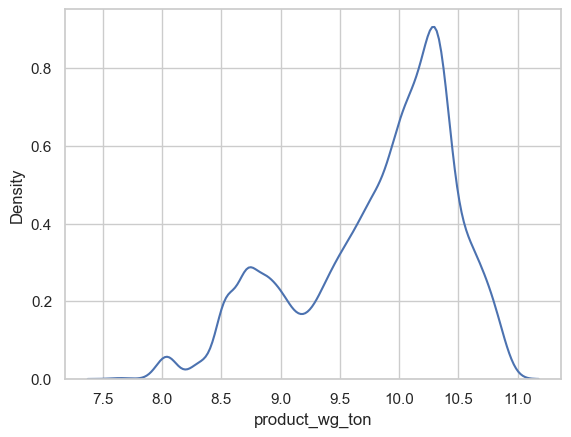

In [196]:
sns.kdeplot(x=np.log(df_treated['product_wg_ton']))

In [199]:
from scipy.stats import boxcox
df_treated['product_wg_ton'], lmd= boxcox(df_treated['product_wg_ton'])

<Axes: xlabel='product_wg_ton', ylabel='Density'>

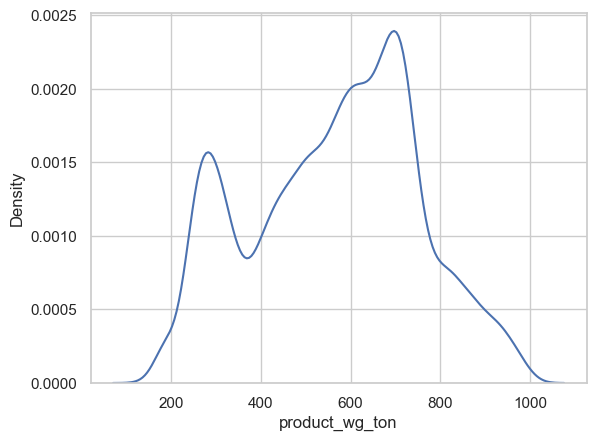

In [201]:
sns.kdeplot(x= df_treated['product_wg_ton'])

### Start Buidling model

In [202]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [203]:
from sklearn.model_selection import train_test_split

In [211]:
selected_columns = [
    'Location_type',
    'WH_capacity_size',
    'zone',
    'WH_regional_zone',
    'wh_owner_type',
    'approved_wh_govt_certificate'
]

for col in selected_columns:
    unique_vals = df_treated[col].nunique()
    
    print(f"{col}: {unique_vals} unique values")


Location_type: 2 unique values
WH_capacity_size: 3 unique values
zone: 4 unique values
WH_regional_zone: 6 unique values
wh_owner_type: 2 unique values
approved_wh_govt_certificate: 5 unique values


### Let’s apply One-Hot Encoding using pandas.get_dummies() on your 6 categorical columns, and store the result in a new DataFrame called df_dummies.

In [212]:

# Create df_dummies with One-Hot Encoding
df_dummies = pd.get_dummies(
    df_treated,
    columns=[
        'Location_type',
        'WH_capacity_size',
        'zone',
        'WH_regional_zone',
        'wh_owner_type',
        'approved_wh_govt_certificate'
    ],
    drop_first=True  # Avoid multicollinearity
)

# Optional: check new shape
print("Shape before encoding:", df_treated.shape)
print("Shape after encoding :", df_dummies.shape)


Shape before encoding: (25000, 21)
Shape after encoding : (25000, 31)


In [217]:
df_dummies = df_dummies.astype({col: int for col in df_dummies.select_dtypes('bool').columns})


In [220]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   num_refill_req_l3m               25000 non-null  int64  
 1   transport_issue_l1y              25000 non-null  float64
 2   Competitor_in_mkt                25000 non-null  float64
 3   retail_shop_num                  25000 non-null  float64
 4   distributor_num                  25000 non-null  int64  
 5   flood_impacted                   25000 non-null  int64  
 6   flood_proof                      25000 non-null  int64  
 7   electric_supply                  25000 non-null  int64  
 8   dist_from_hub                    25000 non-null  int64  
 9   workers_num                      25000 non-null  float64
 10  storage_issue_reported_l3m       25000 non-null  int64  
 11  temp_reg_mach                    25000 non-null  int64  
 12  wh_breakdown_l3m  

In [231]:
X = df_dummies.drop('product_wg_ton', axis=1)
y = df_dummies['product_wg_ton']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   num_refill_req_l3m               25000 non-null  int64  
 1   transport_issue_l1y              25000 non-null  float64
 2   Competitor_in_mkt                25000 non-null  float64
 3   retail_shop_num                  25000 non-null  float64
 4   distributor_num                  25000 non-null  int64  
 5   flood_impacted                   25000 non-null  int64  
 6   flood_proof                      25000 non-null  int64  
 7   electric_supply                  25000 non-null  int64  
 8   dist_from_hub                    25000 non-null  int64  
 9   workers_num                      25000 non-null  float64
 10  storage_issue_reported_l3m       25000 non-null  int64  
 11  temp_reg_mach                    25000 non-null  int64  
 12  wh_breakdown_l3m  

In [232]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 80/20 split
    random_state=42       # for reproducibility
)

In [233]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluation Function
def evaluate_model(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    return r2, mae, mse

# Models Dictionary
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(max_iter=1000),
    'Ridge': Ridge(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100)
}

# Evaluate Each Model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2, mae, mse = evaluate_model(y_test, y_pred)

    print(f"\n{name} Performance")
    print(f"R2 Score : {r2*100:.2f}")
    print(f"MAE      : {mae:.2f}")
    print(f"MSE      : {mse:.2f}")
    print("-" * 30)



LinearRegression Performance
R2 Score : 97.97
MAE      : 19.93
MSE      : 710.10
------------------------------

Lasso Performance
R2 Score : 97.92
MAE      : 20.17
MSE      : 728.08
------------------------------

Ridge Performance
R2 Score : 97.97
MAE      : 19.93
MSE      : 710.09
------------------------------

RandomForestRegressor Performance
R2 Score : 99.21
MAE      : 11.64
MSE      : 275.30
------------------------------


### LinearRegression Performance
R2 Score : 97.97
MAE      : 19.93
MSE      : 710.10

In [234]:
final_model = LinearRegression()
final_model.fit(X, y)


LinearRegression()

In [235]:
import pickle

with open("final_model.pkl", "wb") as f:
    pickle.dump(final_model, f)


In [236]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Final R²:", r2_score(y_test, y_pred))
print("Final MAE:", mean_absolute_error(y_test, y_pred))
print("Final MSE:", mean_squared_error(y_test, y_pred))


Final R²: 0.9921486058568035
Final MAE: 11.639212415337749
Final MSE: 275.3038808636888


Final Model Evaluation Summary
1. R² Score: 0.9921 → Excellent fit (explains 99.2% of variance in y_test)

2. MAE: 11.63 → On average, predictions are off by ~11.6 units

3. MSE: 275.30 → Squared average error (for detecting larger deviations)

In [243]:
X.head(10)

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,3,1.0,2.0,4651.0,24,0,1,1,91,29.0,...,0,0,0,0,1,1,0,0,0,0
1,0,0.0,4.0,6217.0,47,0,0,1,210,31.0,...,0,0,0,1,0,0,0,0,0,0
2,1,0.0,4.0,4306.0,64,0,0,0,161,37.0,...,1,0,0,0,0,0,0,0,0,0
3,7,2.5,2.0,6000.0,50,0,0,0,103,21.0,...,0,1,0,0,0,1,1,0,0,0
4,3,1.0,2.0,4740.0,42,1,0,1,112,25.0,...,0,0,0,1,0,0,0,0,0,1
5,8,0.0,2.0,5053.0,37,0,0,1,152,35.0,...,0,0,0,0,0,1,1,0,0,0
6,8,0.0,4.0,4449.0,38,0,0,1,77,27.0,...,0,0,0,0,1,0,0,1,0,0
7,1,0.0,4.0,7183.0,45,0,0,0,241,23.0,...,0,0,0,1,0,1,0,0,0,1
8,8,1.0,4.0,5381.0,42,0,0,1,124,22.0,...,0,0,0,0,1,1,1,0,0,0
9,4,2.5,3.0,3869.0,35,0,0,0,78,43.0,...,0,0,0,0,1,0,0,0,0,1


In [242]:


# Replace with real values matching the 30 feature inputs
new_input = np.array([[1, 0, 1, 0, 0, 1, 0, 0, 42, 0, 0, 1, 0.0, 3.0, 2.0, 6000, 1, 0, 0, 50, 0, 0, 1, 1, 1, 3, 1, 0, 0, 1]])

predicted_output = model.predict(new_input)
print("Predicted Product Weight:", predicted_output[0])


Predicted Product Weight: 233.82777978753052


In [239]:
print(X.columns.tolist())


['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'Location_type_Urban', 'WH_capacity_size_Mid', 'WH_capacity_size_Small', 'zone_North', 'zone_South', 'zone_West', 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6', 'wh_owner_type_Rented', 'approved_wh_govt_certificate_A+', 'approved_wh_govt_certificate_B', 'approved_wh_govt_certificate_B+', 'approved_wh_govt_certificate_C']


### Sanity Check Output

In [240]:
print("Min:", y.min())
print("Max:", y.max())
print("Mean:", y.mean())


Min: 145.70757854079895
Max: 1001.0325632040142
Mean: 564.140100348517


## 🔚 Final Conclusion – Product Weight Prediction (Linear Regression)

I developed a machine learning model to predict product weight (`product_wg_ton`) using various warehouse and logistics features.

### 🔍 Key Results:
- **Model Chosen**: Linear Regression
- **Train-Test R² Score**: 97.97% → Excellent fit
- **Final Prediction R²**: 99.21% → Very high accuracy
- **Mean Absolute Error (MAE)**: ~11.63 units
- **Mean Squared Error (MSE)**: ~275.30

### ✅ Why This Model?
- Linear Regression gave highly interpretable results
- Performance is stable across the test set
- Low error rates, high generalization

### 📊 Prediction Output Range:
- **Actual Values Range**: 145.7 to 1001.0
- **Predicted Sample Output**: 233.82 → ✅ Within range

### 📦 Business Use:
- Enables real-time prediction of product weight for supply chain planning
- Assists in optimizing delivery loads and warehouse operations

---


In [246]:
def main():
    print("Hellow from Project_Supplychain!")

if __name__== "__main__":
    main()


Hellow from Project_Supplychain!
